# Import Dependencies

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score

# Loading Data Set

In [2]:
data = pd.read_excel("Linear Regression.xlsx",sheet_name=0)

In [4]:
data.head()

,price,sqft_living,bedrooms,bathrooms,floors
0,221900,1180,3,1.00,1.0
1,538000,2570,3,2.25,2.0
2,180000,770,2,1.00,1.0
3,604000,1960,4,3.00,1.0
4,510000,1680,3,2.00,1.0


In [8]:
data.shape

(21613, 5)

In [9]:
data.size

108065

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  int64  
 1   sqft_living  21613 non-null  int64  
 2   bedrooms     21613 non-null  int64  
 3   bathrooms    21613 non-null  float64
 4   floors       21613 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 844.4 KB


In [7]:
data.isna().sum()

price          0
sqft_living    0
bedrooms       0
bathrooms      0
floors         0
dtype: int64

In [10]:
data.dtypes

price            int64
sqft_living      int64
bedrooms         int64
bathrooms      float64
floors         float64
dtype: object

# Data visualization

In [11]:
data.columns

Index(['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors'], dtype='object')

[]

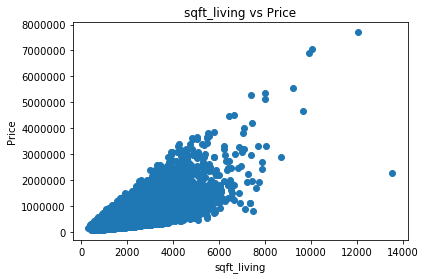

In [13]:
plt.scatter(data['sqft_living'],data['price'])
plt.title("sqft_living vs Price")
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.plot()

[]

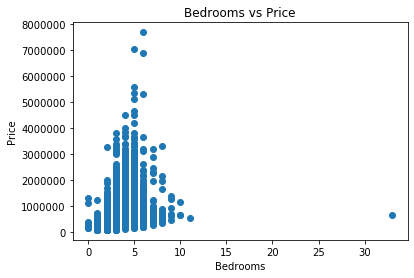

In [15]:
plt.scatter(data['bedrooms'],data['price'])
plt.title("Bedrooms vs Price")
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.plot()

[]

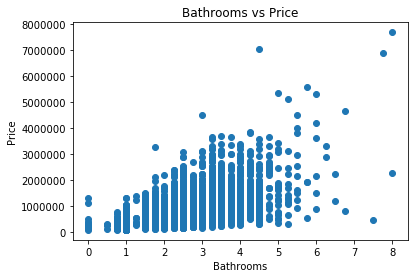

In [18]:
plt.scatter(data['bathrooms'],data['price'])
plt.title("Bathrooms vs Price")
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.plot()

[]

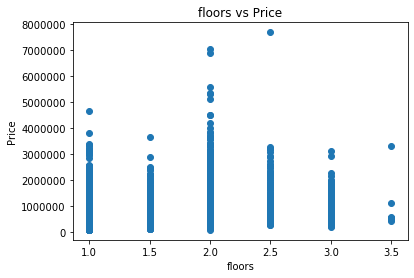

In [20]:
plt.scatter(data['floors'],data['price'])
plt.title("floors vs Price")
plt.xlabel('floors')
plt.ylabel('Price')
plt.plot()

In [21]:
from scipy.stats import pearsonr

In [22]:
corr = data[['price', 'sqft_living', 'bedrooms', 'bathrooms', 'floors']].corr()

In [23]:
corr

,price,sqft_living,bedrooms,bathrooms,floors
price,1.000000,0.702035,0.308350,0.525138,0.256794
sqft_living,0.702035,1.000000,0.576671,0.754665,0.353949
bedrooms,0.308350,0.576671,1.000000,0.515884,0.175429
bathrooms,0.525138,0.754665,0.515884,1.000000,0.500653
floors,0.256794,0.353949,0.175429,0.500653,1.000000


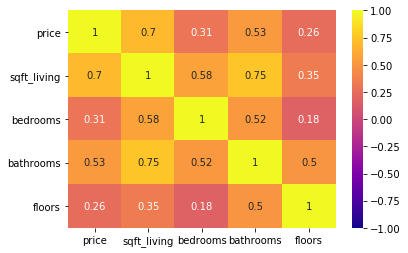

In [24]:
sns.heatmap(corr,vmin=-1,vmax=1,annot=True,cmap='plasma')

# Simple Linear Regression

# Price and sqft_living

In [3]:
X = data.iloc[:,1:2]
y = data.iloc[:,:1]

In [4]:
X.head()

,sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


In [5]:
X_train,X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [6]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(17290, 1) (4323, 1) (17290, 1) (4323, 1)


In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lr = LinearRegression(normalize=True)

In [9]:
lr.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [10]:
lr.intercept_

array([-48257.06345556])

In [11]:
lr.coef_

array([[283.96855737]])

[]

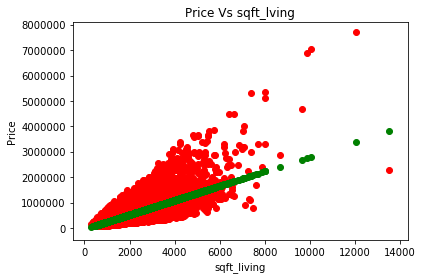

In [12]:
plt.scatter(X_train , y_train,color='r')
plt.scatter(X_train , lr.predict(X_train),color='green')
plt.title('Price Vs sqft_lving')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.plot()

In [18]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test , y_pred)
r2score = r2_score(y_test , y_pred)
                         
                         
print("MSE : ",mse)
print("r2_score : ",r2score)


MSE :  61940787221.49824
r2_score :  0.47915770799654944


# Price vs Bedrooms

In [52]:
X = data.iloc[:,2:3]
y = data.iloc[:,:1]

In [53]:
X_train,X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [54]:
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(17290, 1) (4323, 1) (17290, 1) (4323, 1)


In [55]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [58]:
lr.intercept_

array([126751.84604781])

In [59]:
lr.coef_

array([[123535.45915908]])

[]

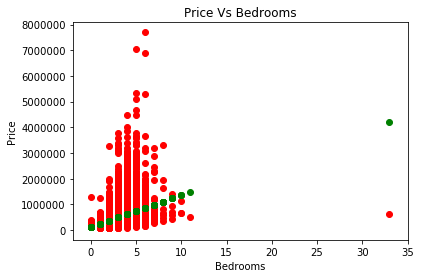

In [61]:
plt.scatter(X_train , y_train,color='r')
plt.scatter(X_train , lr.predict(X_train),color='green')
plt.title('Price Vs Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.plot()

# Price vs Bathrooms

In [62]:
X = data.iloc[:,3:4]
y = data.iloc[:,:1]

In [63]:
X_train,X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [64]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

[]

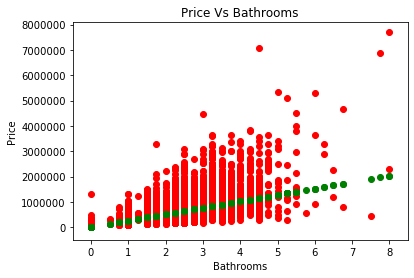

In [66]:
plt.scatter(X_train , y_train,color='r')
plt.scatter(X_train , lr.predict(X_train),color='green')
plt.title('Price Vs Bathrooms')
plt.xlabel('Bathrooms')
plt.ylabel('Price')
plt.plot()

In [67]:
lr.predict(X_test)

array([[386209.02923965],
       [829420.96596062],
       [196261.05635923],
       ...,
       [639472.9930802 ],
       [259577.04731937],
       [576157.00212006]])

# Price vs Floors

In [69]:
X = data.iloc[:,4:5]
y = data.iloc[:,:1]

In [70]:
X_train,X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [71]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

[]

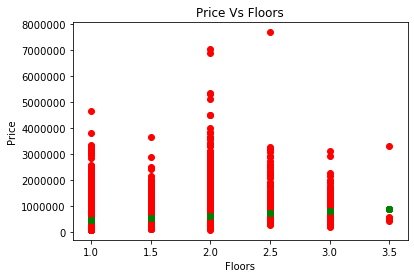

In [72]:
plt.scatter(X_train , y_train,color='r')
plt.scatter(X_train , lr.predict(X_train),color='green')
plt.title('Price Vs Floors')
plt.xlabel('Floors')
plt.ylabel('Price')
plt.plot()

# Multiple Linear Regression

In [78]:
X = data.iloc[:,1:]
y = data.iloc[:,:1]

In [79]:
X.head()

,sqft_living,bedrooms,bathrooms,floors
0,1180,3,1.00,1.0
1,2570,3,2.25,2.0
2,770,2,1.00,1.0
3,1960,4,3.00,1.0
4,1680,3,2.00,1.0


In [80]:
y.head()

,price
0,221900
1,538000
2,180000
3,604000
4,510000


In [81]:
X_train,X_test ,y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [83]:
multi_lr = LinearRegression(normalize=True)

In [84]:
multi_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [85]:
y_pred = multi_lr.predict(X_test)

In [89]:
from sklearn.metrics import mean_squared_error , r2_score

mse = mean_squared_error(y_test , y_pred)

In [92]:
mse = mean_squared_error(y_test , y_pred)
r2score = r2_score(y_test , y_pred)

In [93]:
print("MSE : ",mse)
print("R2_score : ",r2score)

MSE :  59972240621.15348
R2_score :  0.4957106510447661
